# **MÓDULO 12 - Pratique**


Abaixo temos um dataframe com as seguintes informações:


**Nome:** O nome de cada indivíduo da base


**Idade:** A idade de cada um deles


**Profissão:** A atual ocupação


**Salário:** O salário registrado


**Limite de crédito:** O limite de crédito disponível para cada um dos indivíduos


**Historico_Inadimplencia:** Marco como 0 aqueles que nunca tiveram um histórico de inadimplência e como 1 aqueles que já tiveram em algum momento.


**Estado civil:** O estado civil de cada um deles


**Imovel_Proprio:** Marcado como 0 aqueles que não tem imóvel próprio e como 1 aqueles que tem.

In [1]:
import pandas as pd

In [2]:

data = {
    'Nome': ['Alice', 'Joao', 'Charlie', 'David', 'Eva', 'Diego', 'Denize', 'Claudio'],
    'Idade': [25, 30, 35, 40, 45, 60, 22, 24],
    'Profissão': ['Engenheiro', 'Médico', 'Professor', 'Advogado', 'Médico','Engenheiro', 'Estudante','Estudante'],
    'Salário': ['4500', '8000', '5000', '10000', '12000','15000', '1200','1500'],
    'Limite_Credito': ['2500', '4000', '4000', '1000', '10000','2000', '500','250'],
    'Historico_Inadimplencia': ['0', '0', '0', '1', '0','1', '0','1'],
    'Estado_Civil': ['Casamento', 'Casamento', 'Solteiro', 'Solteiro', 'Casamento','Solteiro', 'Solteiro','Solteiro'],
    'Imovel_Proprio': ['0', '0', '0', '1', '1','1', '0','0']
}

df = pd.DataFrame(data)
df.head(5)

,Nome,Idade,Profissão,Salário,Limite_Credito,Historico_Inadimplencia,Estado_Civil,Imovel_Proprio
0,Alice,25,Engenheiro,4500,2500,0,Casamento,0
1,Joao,30,Médico,8000,4000,0,Casamento,0
2,Charlie,35,Professor,5000,4000,0,Solteiro,0
3,David,40,Advogado,10000,1000,1,Solteiro,1
4,Eva,45,Médico,12000,10000,0,Casamento,1


A proposta da atividade é que utilizem os dados do DataFrame Data e escolham apenas 3 gráficos que ajudem vocês a identificar quais fatores são os principais impulsionadores para aqueles que tem limite de crédito alto.

Durante a exploração de vocês podem utilizar mais de 3 gráficos mas deixem na entrega final apenas os 3 mais assertivos que contenham a informação da mensagem que querem passar, fiquem livres para utilizar as bibliotecas que quiserem para os gráficos.

Justifiquem a escolha dos visuais e despertem o lado analítico de vocês com uma análise acerca do descoberto através dos gráficos. Lembrem o que aprendemos na aula, devemos ser assertivos na nossa mensagem.

### Desenvolvimento

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## 🔎 Interpretação do gráfico de colunas agrupadas

### Esse gráfico mostra:

Como o limite de credito é maior para casados do que para solteiros.

A diferença entre inadimplência histórica e disposição de imóvel próprio entre os dois grupos.

Diferença do salárial média entre as categorias de estado civil.

### Com isso, você consegue extrair insights do tipo:
➡️ Casados podem ter, em média, maior limite de crédito e menor risco de inadimplência, enquanto solteiros podem ter mais imóveis próprios ou salários diferentes.

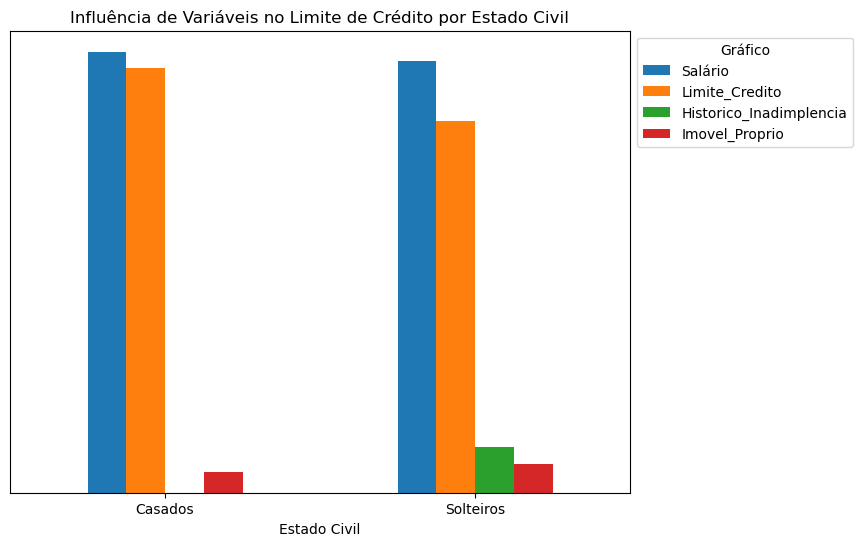

In [41]:
# Colunas agrupadas
# Dados: estado civil e suas e váriaveis que podem influenciar no limites de crédito 

# Conversão de colunas para o tipo númerico 
df['Salário'] = pd.to_numeric(df['Salário'])
df['Historico_Inadimplencia'] = pd.to_numeric(df['Historico_Inadimplencia'])
df['Imovel_Proprio'] = pd.to_numeric(df['Imovel_Proprio'])

# Agrupando por categoria e somando
df_grouped = df.groupby('Estado_Civil')[['Salário', 'Limite_Credito', 'Historico_Inadimplencia', 'Imovel_Proprio']].mean()

# Gráfico de colunas empilhadas
ax = df_grouped.plot(kind='bar', figsize=(8,6), logy=True)

# Rótulos
plt.title('Influência de Variáveis no Limite de Crédito por Estado Civil')
ax.yaxis.set_visible(False)

# Legendas e configuração
plt.xlabel('Estado Civil')
plt.legend(title='Gráfico', loc='upper left', bbox_to_anchor=(1, 1))
ax.set_xticklabels(['Casados', 'Solteiros'], rotation=0)

# Exibindo gráfico
plt.show()

### ✅ O que o código faz

1. Converte colunas relevantes em números (Salário, Historico_Inadimplencia, Imovel_Proprio) para permitir operações matemáticas.

2. Agrupa (groupby) pelo Estado Civil e aplica .mean() nas colunas numéricas (Salário, Limite_Credito, Historico_Inadimplencia, Imovel_Proprio).

3. Gera um gráfico de barras agrupadas (uma barra para cada variável dentro de cada categoria).

4. Aplica escala logarítmica no eixo Y (logy=True) para reduzir o impacto de variáveis muito altas.

5. Remove o eixo Y (ax.yaxis.set_visible(False)) deixando só as barras e a legenda.

## 🔎 Interpretação do gráfico Treemap (Mapa de Árvore)

### Esse gráfico mostra:

O limite médio de crédito dos clientes de acordo com a profissão e a idade.
- Cada retângulo representa uma profissão, subdividida pelas diferentes idades.
  
- O tamanho do retângulo indica o valor médio do limite de crédito: quanto maior a área, maior o limite.
  
- A cor representa a idade, permitindo visualizar como a faixa etária influencia dentro de cada profissão.

### Com isso, você consegue extrair insights do tipo:

Profissões com maiores limites de crédito: destacam-se médicos, engenheiros e professores.

Variação do limite de credito dentro da mesma profissão conforme a idade: médicos tendem a alcançar limites mais altos à medida que envelhecem, enquanto os engenheiros concentram-se nas faixas etárias mais jovens.

Diferenças de consistência entre profissões: algumas apresentam grande disparidade de limites entre idades (como engenheiros, que têm tanto profissionais mais velhos quanto estudantes mais novos), enquanto outras mantêm valores mais estáveis ao longo das idades.

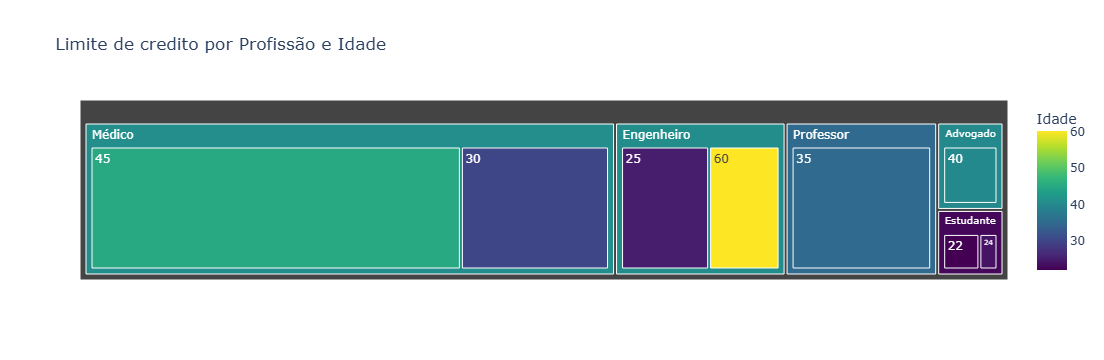

In [43]:
# Gráfico interativo (Qual o nome deste tipo de gráfico)
# Dados: comparando o limite de credito que as profissões tem de acordo com a idade

# Conversão da coluna Limite de credito para o tipo númerico
df['Limite_Credito'] = pd.to_numeric(df['Limite_Credito'])

# Agrupamento dos DataFrame por profissão, idade, e calculando a média do limite de credito
limite_por_profissao_idade = df.groupby(['Profissão', 'Idade'])['Limite_Credito'].mean().reset_index()

# Criando o gráfico de treemap com os limites de credito por profissão, usando as cores para representar a idade
fig = px.treemap(limite_por_profissao_idade, path=['Profissão', 'Idade'], 
                 values = 'Limite_Credito', 
                 title = 'Limite de credito por Profissão e Idade', 
                 color = 'Idade',
                 color_continuous_scale=px.colors.sequential.Viridis)

# Exibindo gráfico
fig.show()

### ✅ O que o código faz

1. Converte a coluna Limite_Credito para o tipo numérico, garantindo que os cálculos sejam feitos corretamente.

2. Agrupa os dados por Profissão e Idade, calculando a média do limite de crédito para cada combinação.

3. Cria o gráfico de Treemap com a biblioteca plotly.express, onde:

    - O parâmetro path=['Profissão', 'Idade'] organiza a hierarquia da visualização.

    - O parâmetro values='Limite_Credito' define o tamanho de cada retângulo.

    - O parâmetro color='Idade' aplica uma paleta de cores contínua para destacar diferenças entre as idades.

4. Exibe o gráfico de forma interativa, permitindo explorar os dados com zoom e navegação por hierarquia.

## 🔎 Interpretação do gráfico Boxplot

### Esse gráfico mostra:

A distribuição dos salários dentro do conjunto de dados.
- A mediana indica o salário central da base.

- Os quartis (Q1 e Q3) mostram a dispersão dos 50% centrais dos salários.

- Outliers ou valores extremos aparecem como pontos isolados, destacando salários muito altos ou muito baixos em relação à maioria.

### Com isso, você consegue extrair insights do tipo:

Este gráfico ajuda a identificar desigualdades salariais, destacar possíveis outliers e compreender a distribuição geral dos salários, facilitando análises mais precisas sobre a base de dados.

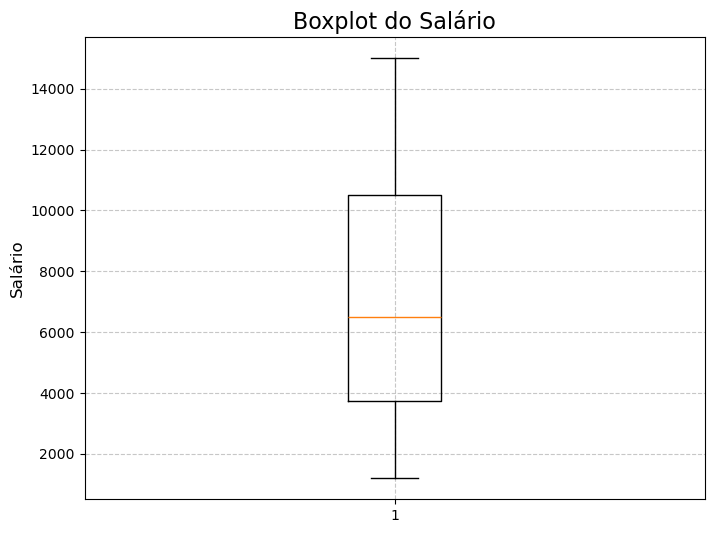

In [42]:
# Box Plot

# Conversão da coluna Sálario para o tipo númerico 
df['Salário'] = pd.to_numeric(df['Salário'])

# Criando o boxplot apenas para a coluna de salário
plt.figure(figsize=(8, 6))
plt.boxplot(df['Salário'])

# Legendas, rótulos e configuração:
plt.title('Boxplot do Salário', fontsize=16)
plt.ylabel('Salário', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Exibindo gráfico
plt.show()

### ✅ O que o código faz

1. Converte a coluna "Salário" para numérico: Isso garante que os dados possam ser processados pelo matplotlib e evita erros na criação do boxplot.

2. Cria o boxplot:
plt.boxplot(df['Salário']) gera um gráfico que representa a distribuição dos salários, mostrando mediana, quartis e possíveis valores extremos.

3. Configura títulos, rótulos e grade:
Adiciona informações visuais importantes para facilitar a interpretação dos dados.